# San Francisco Housing Cost Analysis

In this assignment, you will perform fundamental analysis for the San Francisco housing market to allow potential real estate investors to choose rental investment properties.

In [2]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
from dotenv import load_dotenv

import warnings
warnings.filterwarnings('ignore')


Bad key "text.kerning_factor" on line 4 in
C:\Users\raman\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [3]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("mapbox")

## Load Data

In [4]:
# Read the census data into a Pandas DataFrame
file_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")
sfo_data.head()

neighborhood  sale_price_sqr_foot  housing_units  gross_rent
year                                                                  
2010      Alamo Square           291.182945         372560        1239
2010        Anza Vista           267.932583         372560        1239
2010           Bayview           170.098665         372560        1239
2010  Buena Vista Park           347.394919         372560        1239
2010  Central Richmond           319.027623         372560        1239

- - - 

## Housing Units Per Year

In this section, you will calculate the number of housing units per year and visualize the results as a bar chart using the Pandas plot function.

**Hint:** Use the Pandas `groupby` function.

**Optional challenge:** Use the min, max, and std to scale the y limits of the chart.



In [5]:
# Calculate the mean number of housing units per year (hint: use groupby) 
# YOUR CODE HERE!

sfo_data_by_year = sfo_data.groupby(["year"])["housing_units"].mean()

sfo_data_by_year_min = sfo_data_by_year.min()

sfo_data_by_year_max = sfo_data_by_year.max()

sfo_data_by_year_std = sfo_data_by_year.std()

sfo_data_by_year

year
2010    372560.0
2011    374507.0
2012    376454.0
2013    378401.0
2014    380348.0
2015    382295.0
2016    384242.0
Name: housing_units, dtype: float64

year
2010    372560
2011    374507
2012    376454
2013    378401
2014    380348
2015    382295
2016    384242
Name: housing_units, dtype: int64

In [6]:
# Save the dataframe as a csv file
# YOUR CODE HERE!

sfo_data_by_year.to_csv("SFO housing units by year")

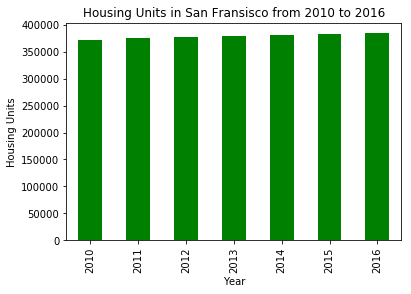

In [51]:
# Use the Pandas plot function to plot the average housing units per year.
# Note: You will need to manually adjust the y limit of the chart using the min and max values from above.
# YOUR CODE HERE!



sfo_data_by_year.plot(title = "Housing Units in San Fransisco from 2010 to 2016", xlabel = 'Year', ylabel = 'Housing Units', color="green", kind="bar")

plt.savefig("../Images/unscaled-bar.png")

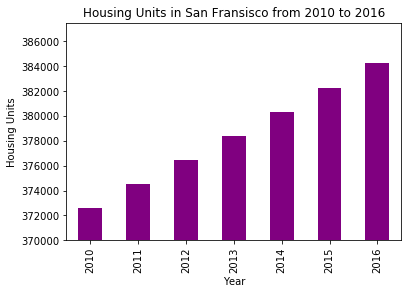

In [52]:
# Optional Challenge: Use the min, max, and std to scale the y limits of the chart
# YOUR CODE HERE!

sfo_data_by_year.plot(title = "Housing Units in San Fransisco from 2010 to 2016", xlabel = 'Year', color="purple", ylim = (370000, 387500), ylabel = 'Housing Units', kind="bar")

plt.savefig("../Images/scaled-bar.png")

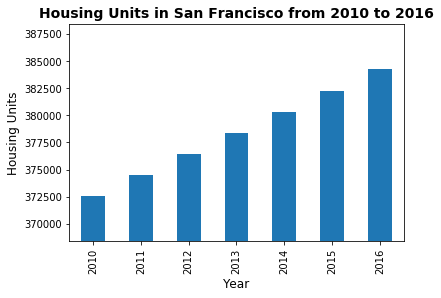

- - - 

## Average Housing Costs in San Francisco Per Year

In this section, you will calculate the average monthly rent and the average price per square foot for each year. An investor may wish to better understand the sales price of the rental property over time. For example, a customer will want to know if they should expect an increase or decrease in the property value over time so they can determine how long to hold the rental property.  Plot the results as two line charts.

**Optional challenge:** Plot each line chart in a different color.

In [11]:
# Calculate the average sale price per square foot and average gross rent
# YOUR CODE HERE!

sfo_data_average = sfo_data.groupby(["year"]).mean()

sfo_data_sales_rent = sfo_data_average.iloc[:, [0, 2]]

sfo_data_sales_rent

sale_price_sqr_foot  gross_rent
year                                 
2010           369.344353      1239.0
2011           341.903429      1530.0
2012           399.389968      2324.0
2013           483.600304      2971.0
2014           556.277273      3528.0
2015           632.540352      3739.0
2016           697.643709      4390.0

sale_price_sqr_foot  gross_rent
year                                 
2010           369.344353        1239
2011           341.903429        1530
2012           399.389968        2324
2013           483.600304        2971
2014           556.277273        3528
2015           632.540352        3739
2016           697.643709        4390

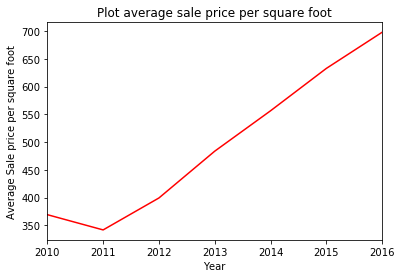

In [12]:
# Create two line charts, one to plot the average sale price per square foot and another for average montly rent

# Line chart for average sale price per square foot
# YOUR CODE HERE!
sfo_data_sales_rent["sale_price_sqr_foot"].plot(xlim = (2010,2016), color= "red", xlabel="Year", ylabel="Average Sale price per square foot", title="Plot average sale price per square foot")

plt.savefig("../Images/average-sales.png")

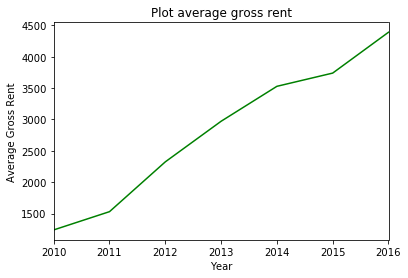

In [13]:
# Line chart for average montly rent
# YOUR CODE HERE!
sfo_data_sales_rent["gross_rent"].plot(xlim = (2010,2016), color = "green", xlabel="Year", ylabel="Average Gross Rent", title="Plot average gross rent")

plt.savefig("../Images/gross-rent.png")


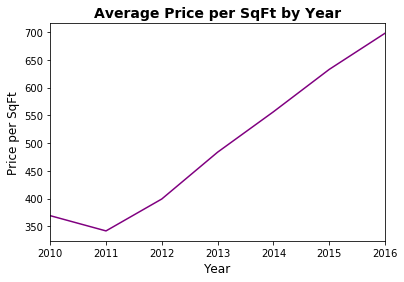

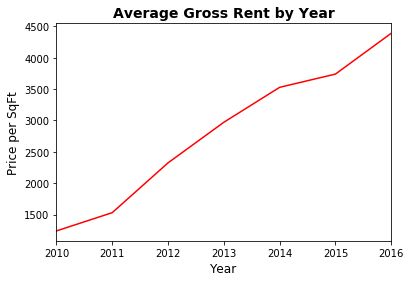

- - - 

## Average Prices by Neighborhood

In this section, you will use hvplot to create two interactive visulizations of average prices with a dropdown selector for the neighborhood. The first visualization will be a line plot showing the trend of average price per square foot over time for each neighborhood.  The second will be a line plot showing the trend of average montly rent over time for each neighborhood.

**Hint:** It will be easier to create a new DataFrame from grouping the data and calculating the mean prices for each year and neighborhood

In [14]:
# Group by year and neighborhood and then create a new dataframe of the mean values
# YOUR CODE HERE!

sfo_groupby_year_neighborhood = sfo_data.groupby(["year", "neighborhood"]).mean()

sfo_average_sales = sfo_groupby_year_neighborhood["sale_price_sqr_foot"]

sfo_average_gross_rent = sfo_groupby_year_neighborhood["gross_rent"]

sfo_groupby_year_neighborhood



sale_price_sqr_foot  housing_units  gross_rent
year neighborhood                                                          
2010 Alamo Square                     291.182945       372560.0      1239.0
     Anza Vista                       267.932583       372560.0      1239.0
     Bayview                          170.098665       372560.0      1239.0
     Buena Vista Park                 347.394919       372560.0      1239.0
     Central Richmond                 319.027623       372560.0      1239.0
...                                          ...            ...         ...
2016 Telegraph Hill                   903.049771       384242.0      4390.0
     Twin Peaks                       970.085470       384242.0      4390.0
     Van Ness/ Civic Center           552.602567       384242.0      4390.0
     Visitacion Valley                328.319007       384242.0      4390.0
     Westwood Park                    631.195426       384242.0      4390.0

[397 rows x 3 columns]

year      neighborhood  sale_price_sqr_foot  housing_units  gross_rent
0  2010      Alamo Square           291.182945         372560        1239
1  2010        Anza Vista           267.932583         372560        1239
2  2010           Bayview           170.098665         372560        1239
3  2010  Buena Vista Park           347.394919         372560        1239
4  2010  Central Richmond           319.027623         372560        1239
5  2010    Central Sunset           418.172493         372560        1239
6  2010    Corona Heights           369.359338         372560        1239
7  2010        Cow Hollow           569.379968         372560        1239
8  2010     Croker Amazon           165.645730         372560        1239
9  2010   Diamond Heights           456.930822         372560        1239

In [21]:
# Use hvplot to create an interactive line chart of the average price per sq ft.
# The plot should have a dropdown selector for the neighborhood
# YOUR CODE HERE!

sfo_average_sales.hvplot(color="red", groupby="neighborhood", xlabel = "Year", ylabel = "Average Sale price", title="HV plot Average sale price vs year interacting with neighborhood", widget_location='left_top')



Row
    [0] Column
        [0] WidgetBox
            [0] Select(margin=(20, 20, 20, 20), name='neighborhood', options=['Alamo Square', ...], value='Alamo Square', width=250)
        [1] VSpacer()
    [1] HoloViews(DynamicMap, widget_location='left_top')

In [22]:
# Use hvplot to create an interactive line chart of the average monthly rent.
# The plot should have a dropdown selector for the neighborhood
# YOUR CODE HERE!

sfo_average_gross_rent.hvplot(color="green", groupby="neighborhood", xlabel = "Year", ylabel = "Average Gross Rent", title="HV plot Average gross rent vs year interacting with neighborhood", widget_location='left_top')

Row
    [0] Column
        [0] WidgetBox
            [0] Select(margin=(20, 20, 20, 20), name='neighborhood', options=['Alamo Square', ...], value='Alamo Square', width=250)
        [1] VSpacer()
    [1] HoloViews(DynamicMap, widget_location='left_top')

## The Top 10 Most Expensive Neighborhoods

In this section, you will need to calculate the mean sale price per square foot for each neighborhood and then sort the values to obtain the top 10 most expensive neighborhoods on average. Plot the results as a bar chart.

In [23]:
# Getting the data from the top 10 expensive neighborhoods to own
# YOUR CODE HERE!

sale_price_descending = sfo_data.groupby(["neighborhood"]).mean().sort_values(ascending=False, by="sale_price_sqr_foot")
top10_expensive = sale_price_descending.head(10)

top10_expensive

sale_price_sqr_foot  housing_units   gross_rent
neighborhood                                                          
Union Square District           903.993258      377427.50  2555.166667
Merced Heights                  788.844818      380348.00  3414.000000
Miraloma Park                   779.810842      375967.25  2155.250000
Pacific Heights                 689.555817      378401.00  2817.285714
Westwood Park                   687.087575      382295.00  3959.000000
Telegraph Hill                  676.506578      378401.00  2817.285714
Presidio Heights                675.350212      378401.00  2817.285714
Cow Hollow                      665.964042      378401.00  2817.285714
Potrero Hill                    662.013613      378401.00  2817.285714
South Beach                     650.124479      375805.00  2099.000000

neighborhood  sale_price_sqr_foot  housing_units   gross_rent
0  Union Square District           903.993258      377427.50  2555.166667
1         Merced Heights           788.844818      380348.00  3414.000000
2          Miraloma Park           779.810842      375967.25  2155.250000
3        Pacific Heights           689.555817      378401.00  2817.285714
4          Westwood Park           687.087575      382295.00  3959.000000
5         Telegraph Hill           676.506578      378401.00  2817.285714
6       Presidio Heights           675.350212      378401.00  2817.285714
7             Cow Hollow           665.964042      378401.00  2817.285714
8           Potrero Hill           662.013613      378401.00  2817.285714
9            South Beach           650.124479      375805.00  2099.000000

In [31]:
# Plotting the data from the top 10 expensive neighborhoods
# YOUR CODE HERE!

top10_expensive["sale_price_sqr_foot"].hvplot.bar(color="green", xlabel="Neighborhood", rot=90, ylabel="Avg.Sale Price per Square Foot", figsize=(20,20), title="Top 10 Expensive Neighborhoods in SFO", width=500, height = 400, legend='top_left')


:Bars   [neighborhood]   (sale_price_sqr_foot)

- - - 

## Comparing cost to purchase versus rental income

In this section, you will use `hvplot` to create an interactive visualization with a dropdown selector for the neighborhood. This visualization will feature a side-by-side comparison of average price per square foot versus average montly rent by year.  

**Hint:** Use the `hvplot` parameter, `groupby`, to create a dropdown selector for the neighborhood.

In [32]:
# Fetch the previously generated DataFrame that was grouped by year and neighborhood
# YOUR CODE HERE!

top10expensive_year_neighborhood = sfo_groupby_year_neighborhood.sort_values(ascending=False, by="sale_price_sqr_foot")

#top10expensive_year_neighborhood

sfo_groupby_year_neighborhood

sale_price_sqr_foot  housing_units  gross_rent
year neighborhood                                                          
2010 Alamo Square                     291.182945       372560.0      1239.0
     Anza Vista                       267.932583       372560.0      1239.0
     Bayview                          170.098665       372560.0      1239.0
     Buena Vista Park                 347.394919       372560.0      1239.0
     Central Richmond                 319.027623       372560.0      1239.0
...                                          ...            ...         ...
2016 Telegraph Hill                   903.049771       384242.0      4390.0
     Twin Peaks                       970.085470       384242.0      4390.0
     Van Ness/ Civic Center           552.602567       384242.0      4390.0
     Visitacion Valley                328.319007       384242.0      4390.0
     Westwood Park                    631.195426       384242.0      4390.0

[397 rows x 3 columns]

year      neighborhood  sale_price_sqr_foot  housing_units  gross_rent
0  2010      Alamo Square           291.182945         372560        1239
1  2010        Anza Vista           267.932583         372560        1239
2  2010           Bayview           170.098665         372560        1239
3  2010  Buena Vista Park           347.394919         372560        1239
4  2010  Central Richmond           319.027623         372560        1239
5  2010    Central Sunset           418.172493         372560        1239
6  2010    Corona Heights           369.359338         372560        1239
7  2010        Cow Hollow           569.379968         372560        1239
8  2010     Croker Amazon           165.645730         372560        1239
9  2010   Diamond Heights           456.930822         372560        1239

In [54]:
# Plotting the data from the top 10 expensive neighborhoods
# YOUR CODE HERE!

sfo_df = sfo_groupby_year_neighborhood.reset_index()
#.hvplot(x=['year', 'neighborhood'], y='housing_units')

sfo_df.hvplot.bar(x='year', y=['gross_rent', 'sale_price_sqr_foot'], cmap=["red", "green"], title='Expensive Neighborhoods in SFO', xlabel='Neighborhood', ylabel='Num Housing Units', groupby="neighborhood", rot=90, height = 500, widget_location='top')


Column
    [0] Row
        [0] HSpacer()
        [1] WidgetBox
            [0] Select(margin=(20, 20, 20, 20), name='neighborhood', options=['Alamo Square', ...], value='Alamo Square', width=250)
        [2] HSpacer()
    [1] HoloViews(DynamicMap, widget_location='top')

- - - 

## Neighborhood Map

In this section, you will read in neighborhoods location data and build an interactive map with the average house value per neighborhood. Use a `scatter_mapbox` from Plotly express to create the visualization. Remember, you will need your Mapbox API key for this.

### Load Location Data

In [37]:
# Load neighborhoods coordinates data
# YOUR CODE HERE!

location_file_path = Path("Data/neighborhoods_coordinates.csv")
location_data= pd.read_csv(location_file_path)
location_data

Neighborhood        Lat         Lon
0         Alamo Square  37.791012 -122.402100
1           Anza Vista  37.779598 -122.443451
2              Bayview  37.734670 -122.401060
3      Bayview Heights  37.728740 -122.410980
4       Bernal Heights  37.728630 -122.443050
..                 ...        ...         ...
68         West Portal  37.740260 -122.463880
69    Western Addition  37.792980 -122.435790
70  Westwood Highlands  37.734700 -122.456854
71       Westwood Park  37.734150 -122.457000
72         Yerba Buena  37.792980 -122.396360

[73 rows x 3 columns]

Neighborhood        Lat         Lon
0     Alamo Square  37.791012 -122.402100
1       Anza Vista  37.779598 -122.443451
2          Bayview  37.734670 -122.401060
3  Bayview Heights  37.728740 -122.410980
4   Bernal Heights  37.728630 -122.443050

### Data Preparation

You will need to join the location data with the mean values per neighborhood.

1. Calculate the mean values for each neighborhood.

2. Join the average values with the neighborhood locations.

In [38]:
# Calculate the mean values for each neighborhood
# YOUR CODE HERE!

neighborhood_meanvalues = sfo_data.groupby('neighborhood').mean().reset_index()

neighborhood_meanvalues.rename(columns = {'neighborhood':'Neighborhood'}, inplace = True)

neighborhood_meanvalues

Neighborhood  sale_price_sqr_foot  housing_units   gross_rent
0         Alamo Square           366.020712      378401.00  2817.285714
1           Anza Vista           373.382198      379050.00  3031.833333
2              Bayview           204.588623      376454.00  2318.400000
3      Bayview Heights           590.792839      382295.00  3739.000000
4      Bernal Heights            576.746488      379374.50  3080.333333
..                 ...                  ...            ...          ...
68         West Portal           498.488485      376940.75  2515.500000
69    Western Addition           307.562201      377427.50  2555.166667
70  Westwood Highlands           533.703935      376454.00  2250.500000
71       Westwood Park           687.087575      382295.00  3959.000000
72         Yerba Buena           576.709848      377427.50  2555.166667

[73 rows x 4 columns]

Neighborhood  sale_price_sqr_foot  housing_units   gross_rent
0     Alamo Square           366.020712       378401.0  2817.285714
1       Anza Vista           373.382198       379050.0  3031.833333
2          Bayview           204.588623       376454.0  2318.400000
3  Bayview Heights           590.792839       382295.0  3739.000000
4  Bernal Heights            576.746488       379374.5  3080.333333

In [39]:
# Join the average values with the neighborhood locations
# YOUR CODE HERE!

#combined_df = pd.concat([location_data, neighborhood_meanvalues])

combined_df = location_data.merge(neighborhood_meanvalues, on='Neighborhood')

center_lat = combined_df["Lat"].mean()
center_lon = combined_df["Lon"].mean()

combined_df



Neighborhood        Lat         Lon  sale_price_sqr_foot  \
0         Alamo Square  37.791012 -122.402100           366.020712   
1           Anza Vista  37.779598 -122.443451           373.382198   
2              Bayview  37.734670 -122.401060           204.588623   
3      Bayview Heights  37.728740 -122.410980           590.792839   
4     Buena Vista Park  37.768160 -122.439330           452.680591   
..                 ...        ...         ...                  ...   
64         West Portal  37.740260 -122.463880           498.488485   
65    Western Addition  37.792980 -122.435790           307.562201   
66  Westwood Highlands  37.734700 -122.456854           533.703935   
67       Westwood Park  37.734150 -122.457000           687.087575   
68         Yerba Buena  37.792980 -122.396360           576.709848   

    housing_units   gross_rent  
0       378401.00  2817.285714  
1       379050.00  3031.833333  
2       376454.00  2318.400000  
3       382295.00  3739.000000  
4       378076.50  2698.833333  
..            ...          ...  
64      376940.75  2515.500000  
65      377427.50  2555.166667  
66      376454.00  2250.500000  
67      382295.00  3959.000000  
68      377427.50  2555.166667  

[69 rows x 6 columns]

Neighborhood        Lat         Lon  sale_price_sqr_foot  \
0      Alamo Square  37.791012 -122.402100           366.020712   
1        Anza Vista  37.779598 -122.443451           373.382198   
2           Bayview  37.734670 -122.401060           204.588623   
3   Bayview Heights  37.728740 -122.410980           590.792839   
4  Buena Vista Park  37.768160 -122.439330           452.680591   

   housing_units   gross_rent  
0       378401.0  2817.285714  
1       379050.0  3031.833333  
2       376454.0  2318.400000  
3       382295.0  3739.000000  
4       378076.5  2698.833333

### Mapbox Visualization

Plot the average values per neighborhood using a Plotly express `scatter_mapbox` visualization.

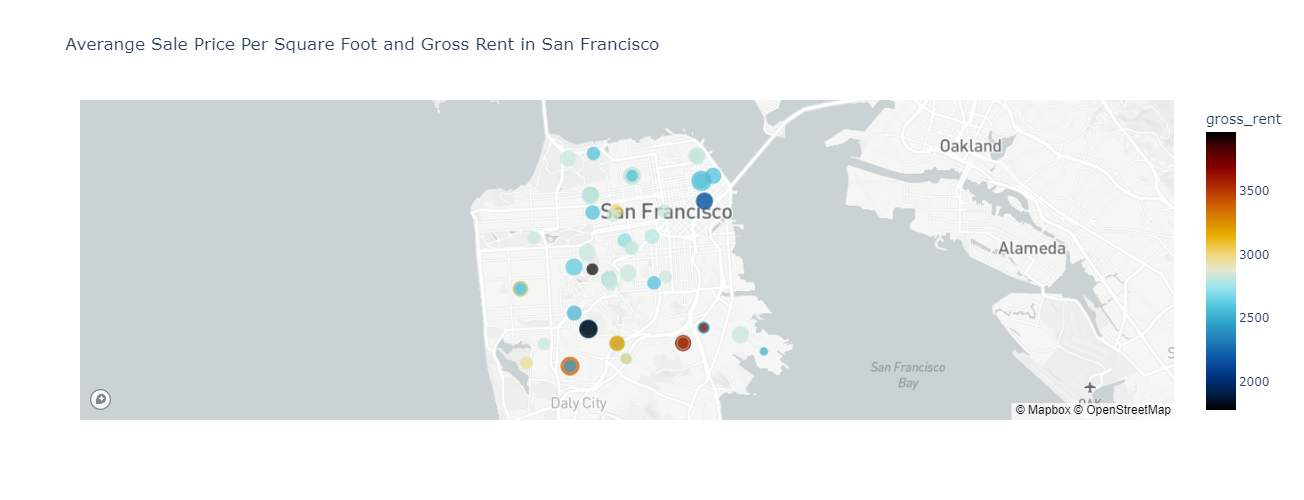

In [53]:
# Set the mapbox access token
# YOUR CODE HERE!

px.set_mapbox_access_token(map_box_api)

# Create a scatter mapbox to analyze neighborhood info
# YOUR CODE HERE!

map_1 = px.scatter_mapbox(
    combined_df,
    lat="Lat",
    lon="Lon",
    color="gross_rent",
    size='sale_price_sqr_foot',
    width=900,
    color_continuous_scale=px.colors.cyclical.IceFire,
    hover_name="Neighborhood",
    height=500,
    zoom=10.5,
    size_max=15,
    title="Averange Sale Price Per Square Foot and Gross Rent in San Francisco",
    center=dict(lat=center_lat, lon=center_lon)
    
    
)



map_1.show()




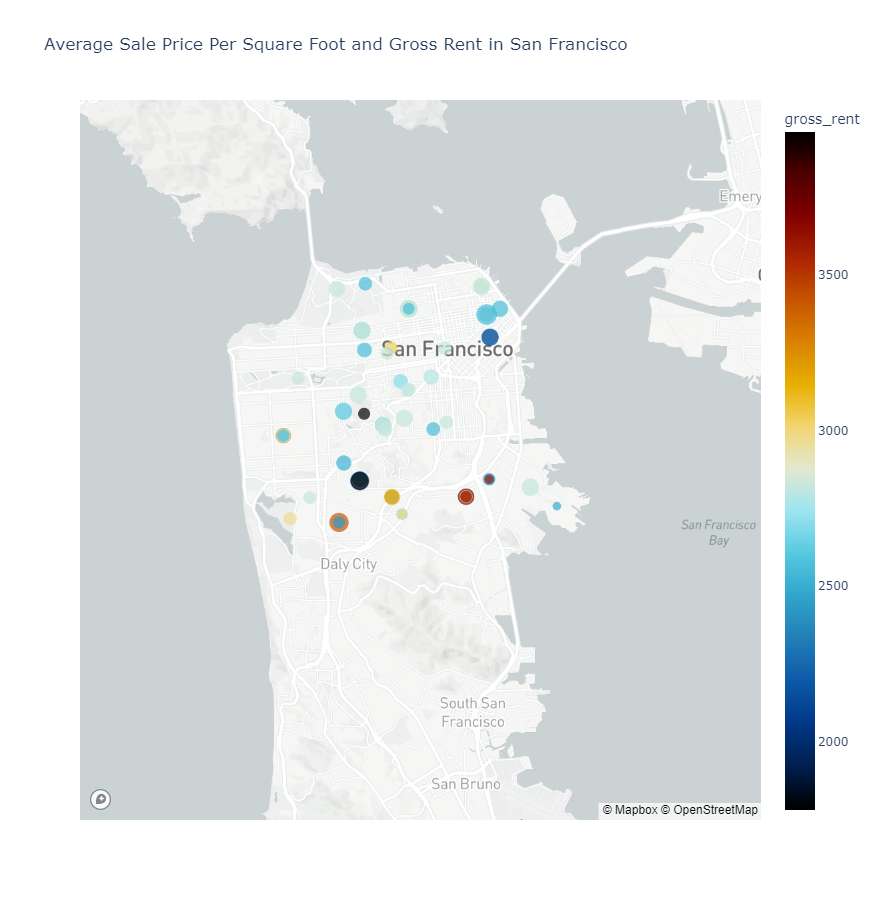

- - -

## Cost Analysis - Optional Challenge

In this section, you will use Plotly express to create visualizations that investors can use to interactively filter and explore various factors related to the house value of the San Francisco's neighborhoods. 

### Create a DataFrame showing the most expensive neighborhoods in San Francisco by year

In [44]:
# Fetch the data from all expensive neighborhoods per year.


df_expensive_neighborhoods=sfo_df

df_costs = top10_expensive

df_costs.reset_index()


neighborhood  sale_price_sqr_foot  housing_units   gross_rent
0  Union Square District           903.993258      377427.50  2555.166667
1         Merced Heights           788.844818      380348.00  3414.000000
2          Miraloma Park           779.810842      375967.25  2155.250000
3        Pacific Heights           689.555817      378401.00  2817.285714
4          Westwood Park           687.087575      382295.00  3959.000000
5         Telegraph Hill           676.506578      378401.00  2817.285714
6       Presidio Heights           675.350212      378401.00  2817.285714
7             Cow Hollow           665.964042      378401.00  2817.285714
8           Potrero Hill           662.013613      378401.00  2817.285714
9            South Beach           650.124479      375805.00  2099.000000

### Create a parallel coordinates plot and parallel categories plot of most expensive neighborhoods in San Francisco per year


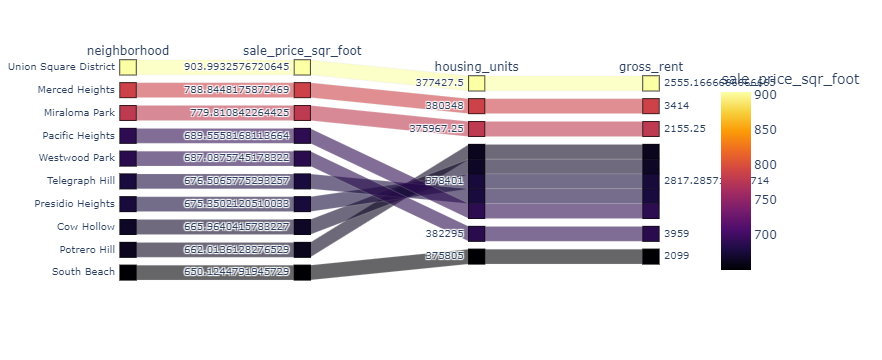

In [45]:
# Parallel Categories Plot
# YOUR CODE HERE!


px.parallel_categories(df_costs.reset_index(), color='sale_price_sqr_foot', color_continuous_scale=px.colors.sequential.Inferno)



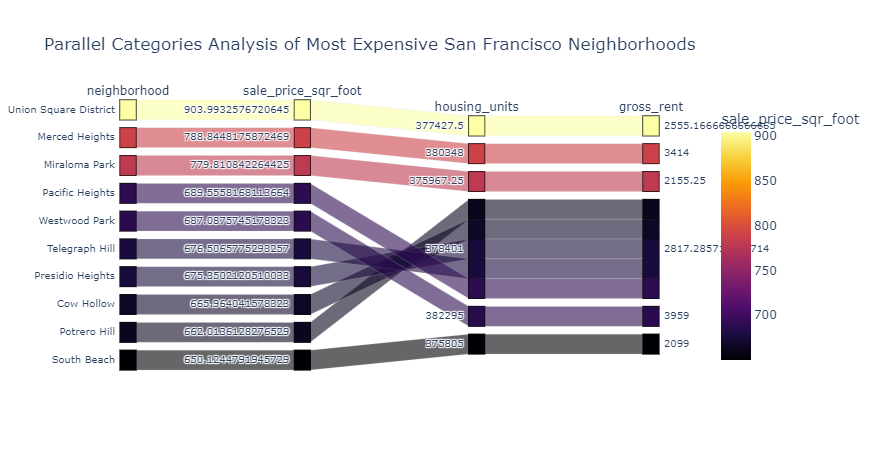

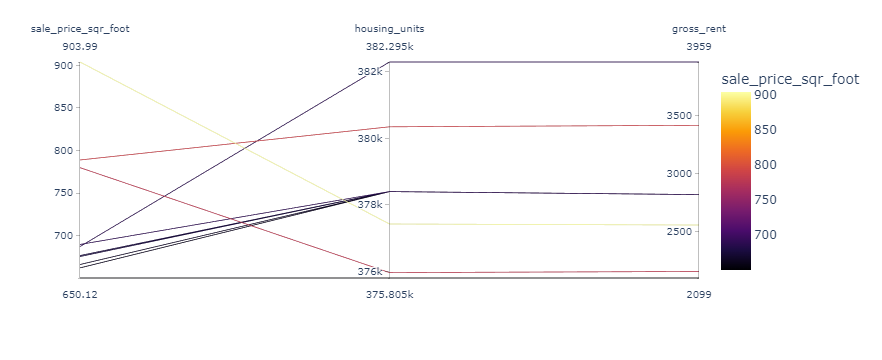

In [46]:
# Parallel Coordinates Plot
# YOUR CODE HERE!

px.parallel_coordinates(df_costs.reset_index(), color='sale_price_sqr_foot', color_continuous_scale=px.colors.sequential.Inferno)

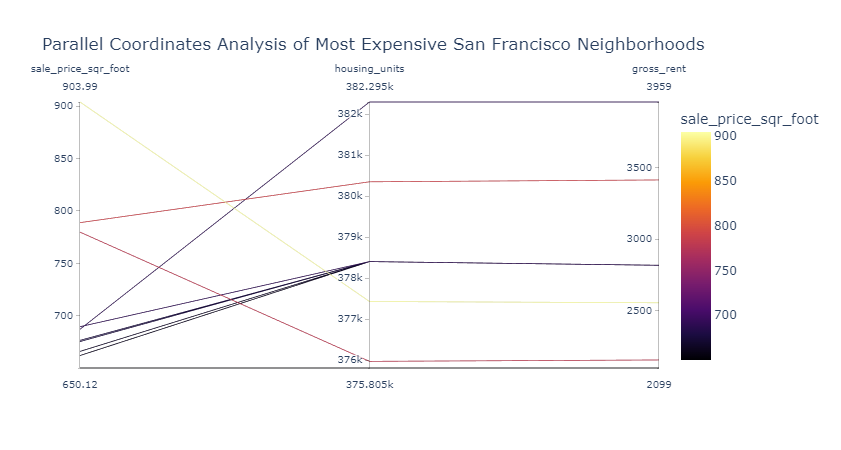

### Create a sunburst chart to conduct a costs analysis of most expensive neighborhoods in San Francisco per year

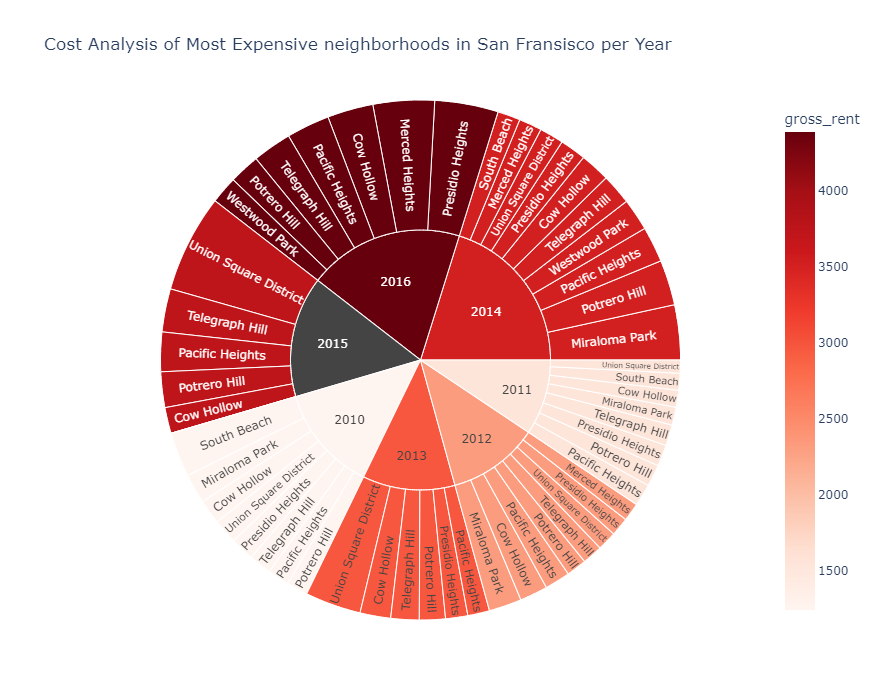

In [48]:
# Sunburst Plot
# YOUR CODE HERE!


sunburst_df = df_expensive_neighborhoods[df_expensive_neighborhoods["neighborhood"].isin(df_costs.reset_index()["neighborhood"])]

px.sunburst(
    sunburst_df,
    names="neighborhood",
    path=['year', 'neighborhood'],
    color="gross_rent",
    values="sale_price_sqr_foot",
    color_continuous_scale='Reds',
    height=700,
    title="Cost Analysis of Most Expensive neighborhoods in San Fransisco per Year"
    
)


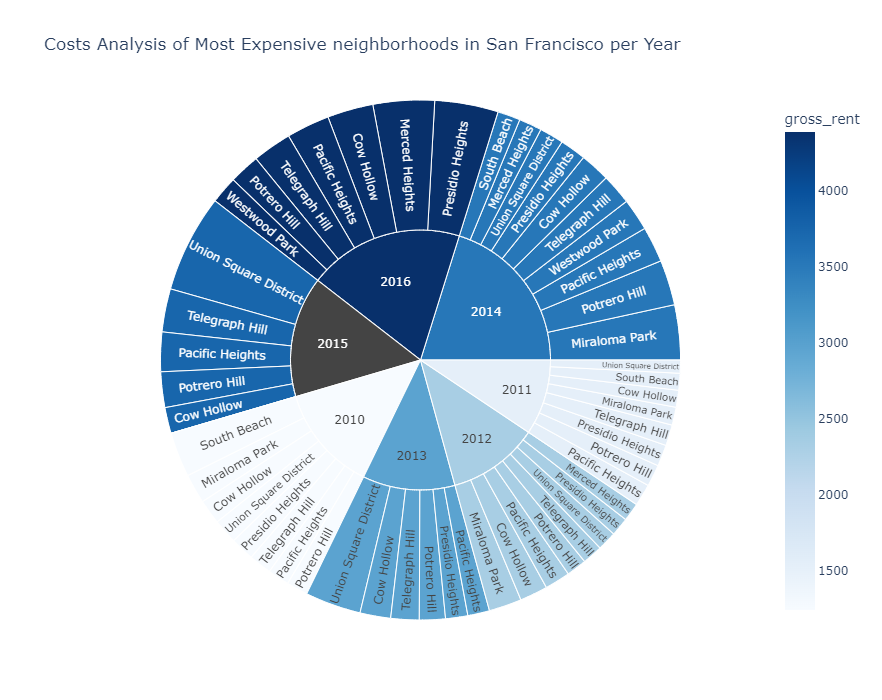